# Miami House Prices - Supervised Machine Learning: Regression

The dataset contains information on 13,982 single family homes sold in Miami in the year 2016. The data is from [Kaggle](https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset) and originates from data pulled from multiple real estate websites. The main objective of the analysis is to predict the selling price of houses in the greater Miami area. Multiple linear regression algorithms will be applied to the data in order to find the relationship between the independent variables consisting of the features of the houses and the dependent variable being the selling price. The estimator with the highest accuracy will be chosen based on the findings of the project.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

## Data Preprocessing

In [22]:
# Read raw data
data = pd.read_csv('miami-housing.csv')
data

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,25.783130,-80.259795,131320040990,275000.0,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,131320040910,340000.0,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,131320040420,287500.0,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,131320040330,315000.0,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

In [24]:
print(f'The total number of rows is {data.shape[0]}')
print(f'The total number of columns is {data.shape[1]}')
print(f'The name of the columns are {list(data.columns)}')
print(f'The number of missing values is \n{data.isnull().sum()}')

The total number of rows is 13932
The total number of columns is 17
The name of the columns are ['LATITUDE', 'LONGITUDE', 'PARCELNO', 'SALE_PRC', 'LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST', 'age', 'avno60plus', 'month_sold', 'structure_quality']
The number of missing values is 
LATITUDE             0
LONGITUDE            0
PARCELNO             0
SALE_PRC             0
LND_SQFOOT           0
TOT_LVG_AREA         0
SPEC_FEAT_VAL        0
RAIL_DIST            0
OCEAN_DIST           0
WATER_DIST           0
CNTR_DIST            0
SUBCNTR_DI           0
HWY_DIST             0
age                  0
avno60plus           0
month_sold           0
structure_quality    0
dtype: int64


Since the data has no missing values, we do not have to worry about imputing missing values.

## List of Features

<b>LATITUDE</b> - latitude 

<b>LONGITUDE</b> - longitude

<b>PARCELNO</b> - unique identifier for each property. About 1% appear multiple times.

<b>LND_SQFOOT</b> - sale price ($)

<b>TOTLVGAREA</b> - land area (square feet)

<b>SPECFEATVAL</b> - floor area (square feet)

<b>RAIL_DIST</b> - value of special features (e.g., swimming pools) ($)

<b>OCEAN_DIST</b> - distance to the nearest rail line (an indicator of noise) (feet)

<b>WATER_DIST</b> - distance to the nearest body of water (feet)

<b>CNTR_DIST</b> - distance to the Miami central business district (feet)

<b>SUBCNTR_DI</b> - distance to the nearest subcenter (feet)

<b>HWY_DIST</b> - distance to the nearest highway (an indicator of noise) (feet)

<b>age</b> - age of the structure

<b>avno60plus</b> - dummy variable for airplane noise exceeding an acceptable level

<b>month_sold</b> - sale month (1 = jan)

<b>structure_quality</b> - quality of the structure

In [25]:
# Drop since unique identifier is not a useful feature
data.drop('PARCELNO', axis=1, inplace=True)

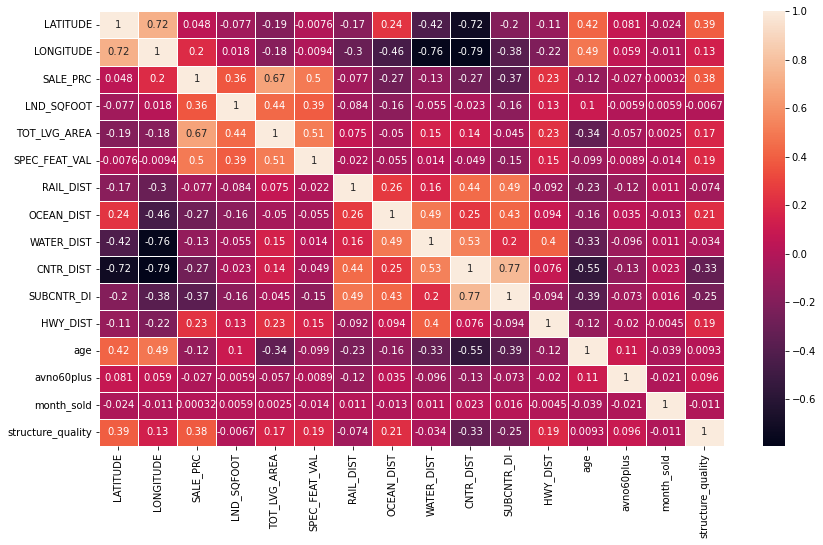

In [26]:
# Visualize correlation matrix
corr = data.corr()
fig = plt.subplots(figsize = (14, 8))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            linewidth=0.5);

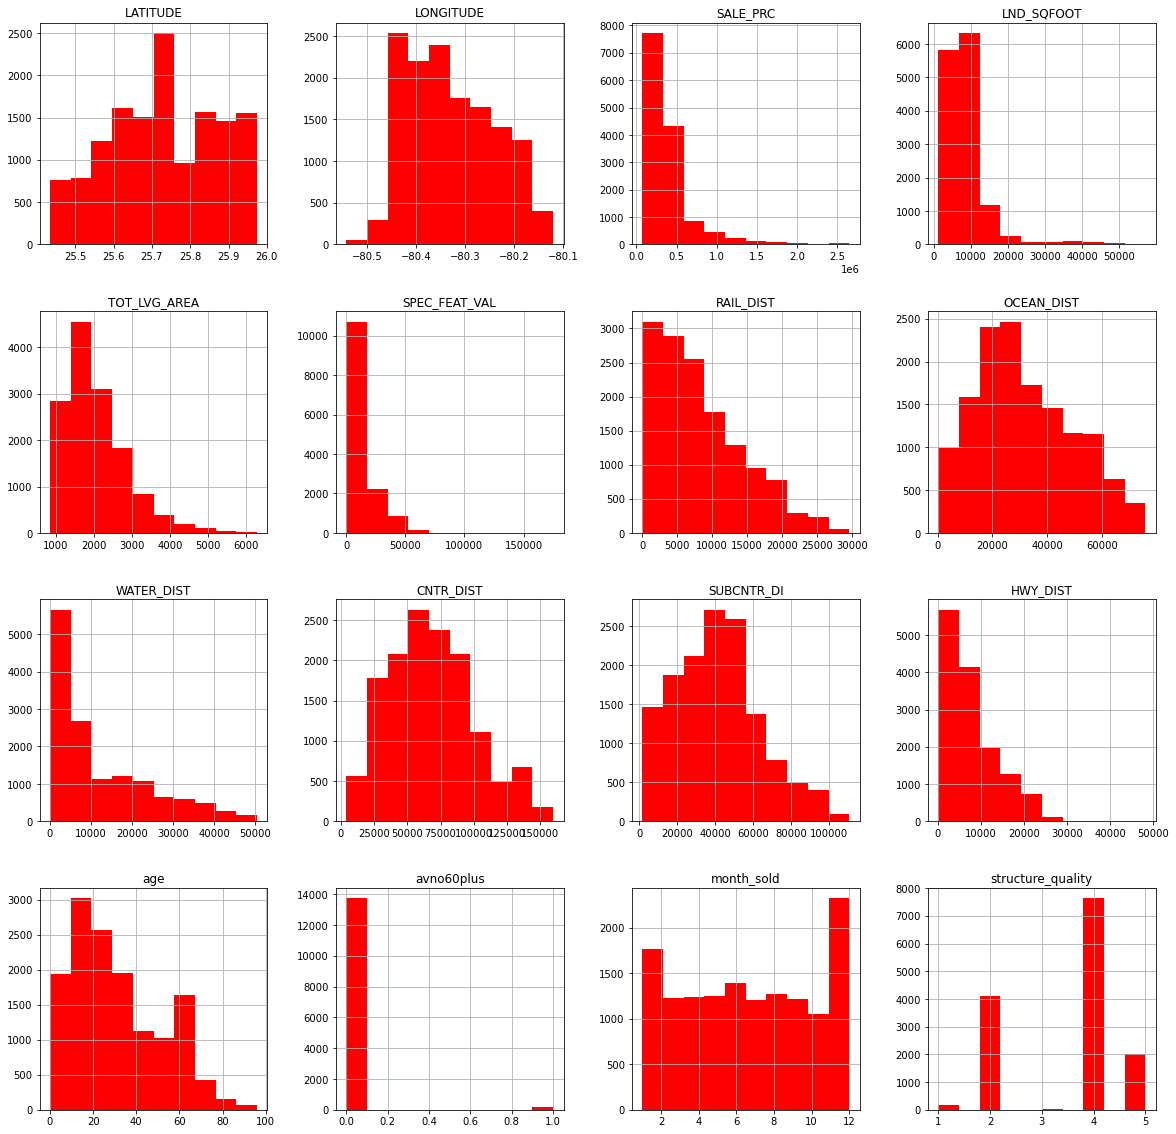

In [27]:
# Visualize histogram to look for skewed data
data.hist(figsize = (20,20), color = 'r');

In [28]:
# Find features that would generally be considered as skewed.
skewed_accumulator = []
skew = data.skew()

def find_skewed_columns(df_columns):
    for column, value in zip(skew.index, skew.values):
        if value > 0.5 or value < -0.5:
            skewed_accumulator.append(column)
    return skewed_accumulator 

skewed_columns = find_skewed_columns(skew)

In [29]:
# Result of filtering skewed features to normalize
skewed_columns

['SALE_PRC',
 'LND_SQFOOT',
 'TOT_LVG_AREA',
 'SPEC_FEAT_VAL',
 'RAIL_DIST',
 'WATER_DIST',
 'HWY_DIST',
 'age',
 'avno60plus',
 'structure_quality']

In [30]:
# Apply log transformation
skewed_transformed = data[skewed_columns].apply(lambda x: np.log(x + 1))
skewed_transformed 

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,WATER_DIST,HWY_DIST,age,avno60plus,structure_quality
0,12.994532,9.145909,7.469654,0.000000,7.943392,5.853925,9.677584,4.219508,0.0,1.609438
1,12.762830,9.145909,7.447751,0.000000,8.380250,5.825410,9.805103,4.158883,0.0,1.609438
2,13.592368,9.145909,7.730614,10.803791,8.392514,5.697429,9.809259,4.127134,0.0,1.609438
3,13.803439,9.429556,7.629976,9.213735,8.430763,0.000000,9.826358,4.158883,0.0,1.609438
4,13.534474,9.457279,7.429521,9.722086,8.310021,5.791793,9.792802,3.761200,0.0,1.609438
...,...,...,...,...,...,...,...,...,...,...
13927,12.524530,8.821880,6.875232,8.791942,8.254659,8.087456,6.822633,2.833213,0.0,1.609438
13928,12.736704,8.922792,7.525640,7.841886,8.187188,8.032263,6.605569,3.295837,0.0,1.609438
13929,12.568982,9.043223,7.148346,7.632886,8.329465,8.185740,6.612981,2.833213,0.0,1.609438
13930,12.660331,8.922792,7.386471,8.051022,8.291020,8.185935,6.441106,2.833213,0.0,1.609438


### Before Log Transformation:

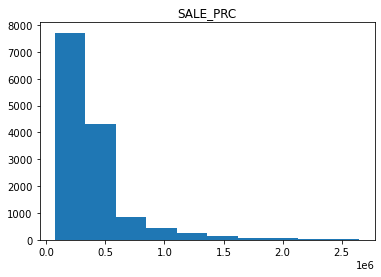

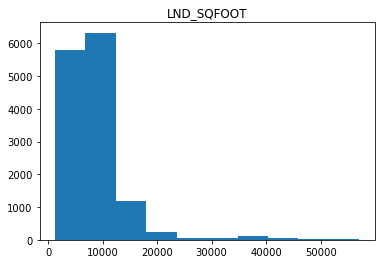

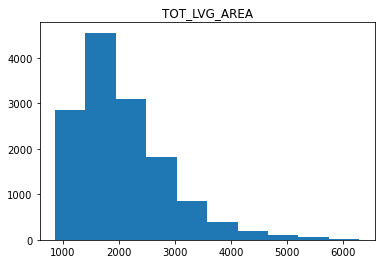

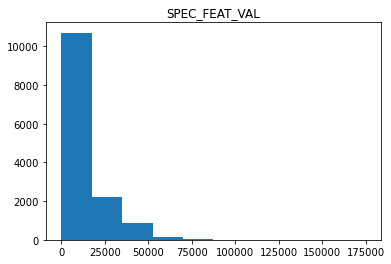

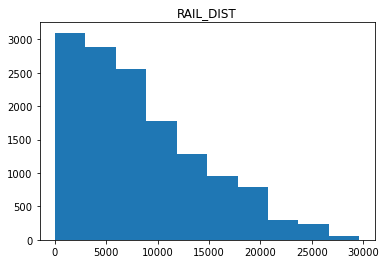

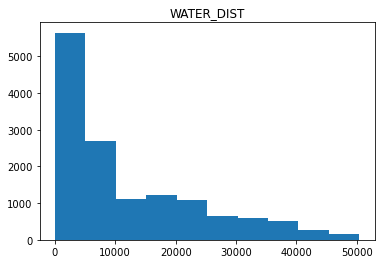

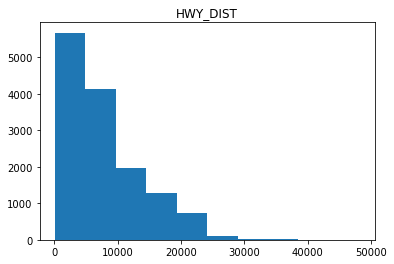

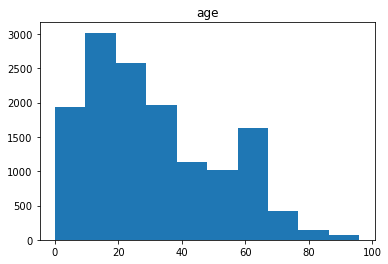

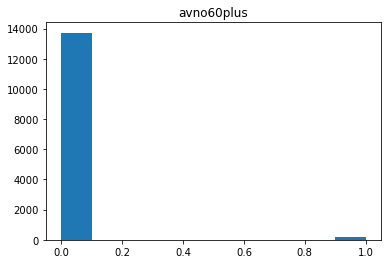

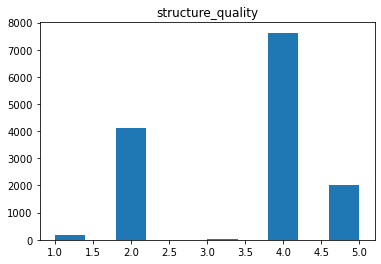

In [31]:
for index in skewed_columns:
    plt.hist(data[index])
    plt.title(index)
    plt.show()

### After Log Transformation

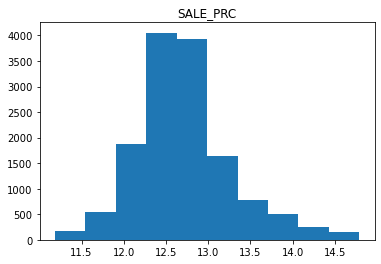

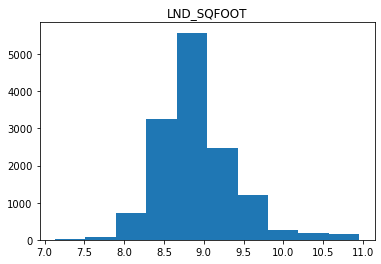

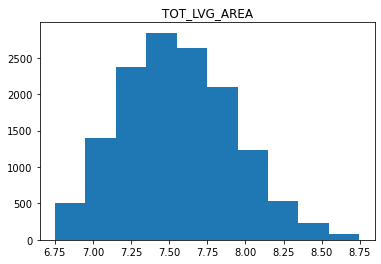

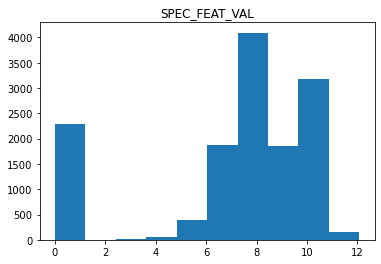

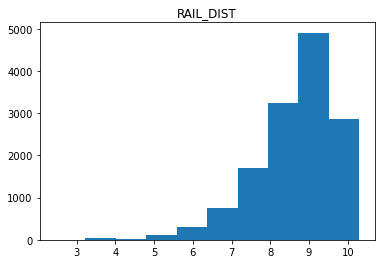

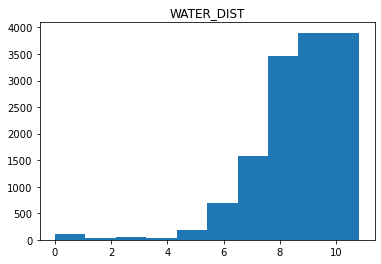

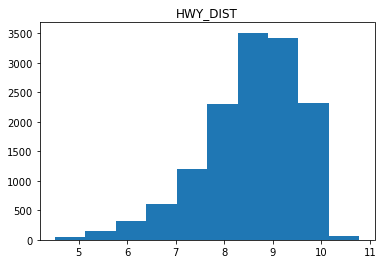

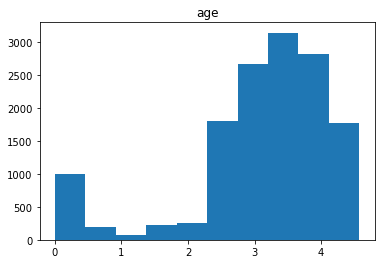

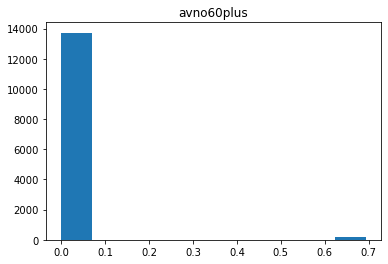

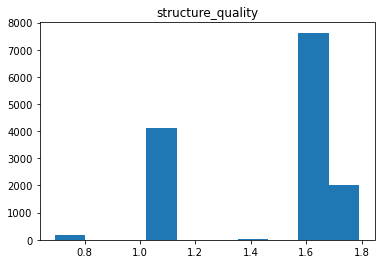

In [32]:
for index in skewed_columns:
    plt.hist(skewed_transformed[index])
    plt.title(index)
    plt.show()

In [33]:
# Impute log transformation to dataset
data[skewed_columns] = skewed_transformed[skewed_columns]
data.head()

,LATITUDE,LONGITUDE,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,12.994532,9.145909,7.469654,0.000000,7.943392,12811.4,5.853925,42815.3,37742.2,9.677584,4.219508,0.0,8,1.609438
1,25.891324,-80.153968,12.762830,9.145909,7.447751,0.000000,8.380250,10648.4,5.825410,43504.9,37340.5,9.805103,4.158883,0.0,9,1.609438
2,25.891334,-80.153740,13.592368,9.145909,7.730614,10.803791,8.392514,10574.1,5.697429,43530.4,37328.7,9.809259,4.127134,0.0,2,1.609438
3,25.891765,-80.152657,13.803439,9.429556,7.629976,9.213735,8.430763,10156.5,0.000000,43797.5,37423.2,9.826358,4.158883,0.0,9,1.609438
4,25.891825,-80.154639,13.534474,9.457279,7.429521,9.722086,8.310021,10836.8,5.791793,43599.7,37550.8,9.792802,3.761200,0.0,7,1.609438


## Training and Testing Models

- Use Kfold object to split data into multiple folds to use for cross validation predictions
- Train using LinearRegression, Lasso, and Ridge Estimators
- Use polynomial features and additional scalers for appropriate models
- Test each model for accuracy

In [35]:
X = data.drop('SALE_PRC', axis=1)
y = data['SALE_PRC']

kf = KFold(shuffle=True, random_state=72018, n_splits=3)

### Linear Regression

In [36]:
s = StandardScaler()
lr = LinearRegression()

estimator = Pipeline([("scaler", s), 
                      ("regression", lr)])

predicted = cross_val_predict(estimator, X, y, cv=kf)
expected = y
linear_regression_score = r2_score(expected, predicted)
linear_regression_score

0.7685390638512051

### Lasso Regression

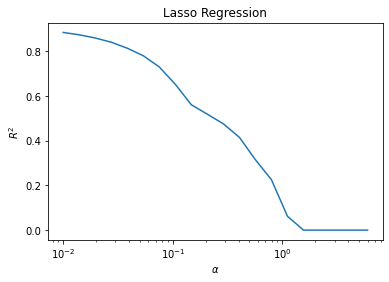

In [50]:
pf = PolynomialFeatures(degree=3)

scores = []
alphas = np.geomspace(0.01, 6.0, 20)
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("higher_degree", pf),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    expected = y
    score = r2_score(expected, predictions)
    
    scores.append(score)

# Visualize accuracy with varying hyperparameter values
plt.semilogx(alphas, scores);
plt.title('Lasso Regression')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [38]:
# Given the above graphic, the hyperparameter value should be low to generate the best result
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.005))])

best_estimator.fit(X, y)
lasso_score = best_estimator.score(X, y)
lasso_score

0.8770921952953787

### Ridge Regression

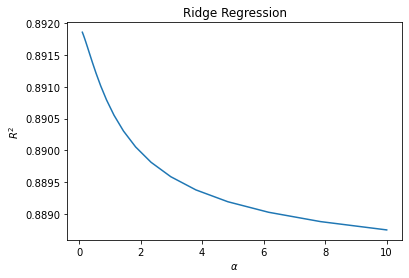

In [39]:
pf = PolynomialFeatures(degree=2)
alphas = np.geomspace(0.1, 10, 20)
scores=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    expected = y
    score = r2_score(expected, predictions)
    scores.append(score)

# Visualize accuracy with varying hyperparameter values
plt.plot(alphas, scores)
plt.title('Ridge Regression')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [40]:
# Given the above graphic, the hyperparameter value should be low to generate the best result
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Ridge(alpha=0.01))])

best_estimator.fit(X, y)
ridge_score = best_estimator.score(X, y)
ridge_score

0.895712188848561

In [41]:
scores_df = pd.DataFrame([linear_regression_score, lasso_score, ridge_score], index=[['Linear Regression', 'Lasso Regression', 'Ridge Regression']], columns=['Score'])
scores_df

,Score
Linear Regression,0.768539
Lasso Regression,0.877092
Ridge Regression,0.895712


## Conclusion/Next Steps

Given the results above, the Ridge Regression model performed the best while the Lasso model was slighly behind and the linear regression having clearly the lowest score of the bunch. Therefore, I would reccomend using the Ridge Model with a properly tuned hyperparameter as this estimator will yield the highest accuracy given the regularization methods and data used. The next step that could be taken to further improve the Lasso and Ridge models would be to use GridCV as a means to optimize the hyperparameter to generate the best results instead of using a visualization to estimate the most optimal hyperparameter. Another step would be to use a different transformation method such as the MinMaxScaler instead of the log transformation method used before training the models to look for better results. Removing some of the data features that may be less relevant could also aid in increasing model performances.